In [1]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset csv file.
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

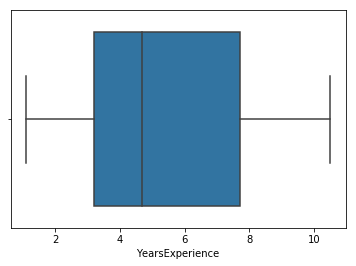

In [9]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['YearsExperience'])

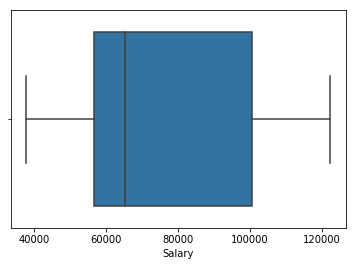

In [10]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['Salary'])

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

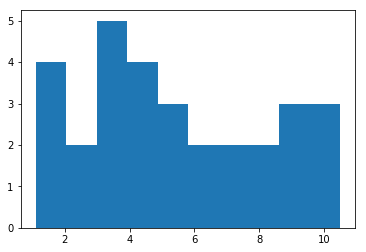

In [11]:
# Histrogram of the feature varibale
plt.hist(df['YearsExperience'])

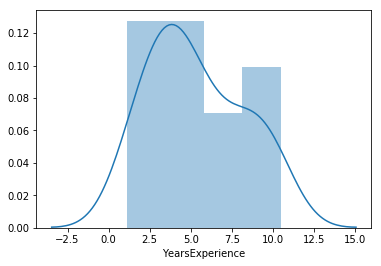

In [12]:
# Distplot of the feature varibale
sns.distplot(df['YearsExperience'])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

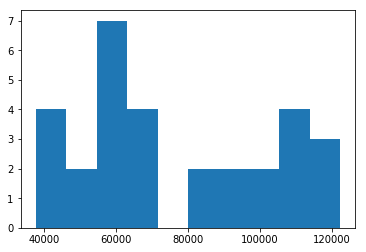

In [13]:
# Histrogram of the feature varibale
plt.hist(df['Salary'])

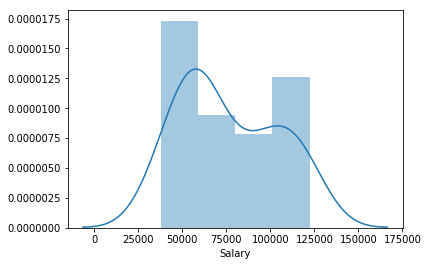

In [14]:
# Distplot of the feature varibale
sns.distplot(df['Salary'])

17.257686921140124 17.048484204349457
76003.0 65237.0


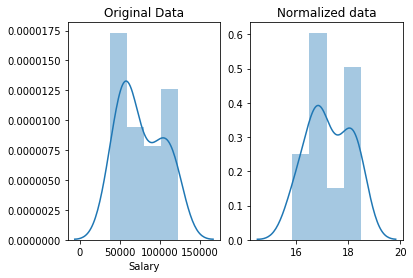

In [15]:

target = stats.boxcox(df['Salary'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['Salary'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(target[0], ax=ax[1])
ax[1].set_title("Normalized data")
print(np.mean(target[0]), np.median(target[0]))
print(df['Salary'].mean(), df['Salary'].median())

In [16]:
from sklearn.preprocessing import normalize

In [17]:
year = normalize([df['YearsExperience']])
salary = normalize([df['Salary']])

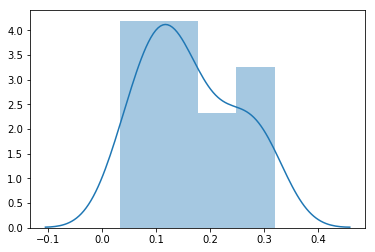

In [18]:
sns.distplot(year)

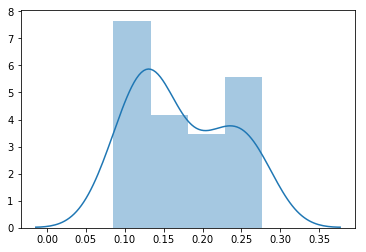

In [19]:
 sns.distplot(salary)

2.3252142905373914 2.245806987939919
5.3133333333333335 4.7


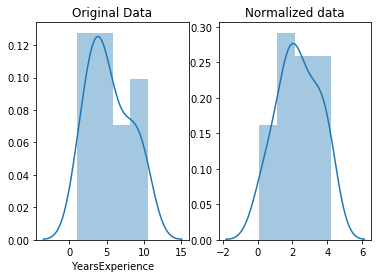

In [20]:
target1 = stats.boxcox(df['YearsExperience'])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['YearsExperience'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(target1[0], ax=ax[1])
ax[1].set_title("Normalized data")
print(np.mean(target1[0]), np.median(target1[0]))
print(df['YearsExperience'].mean(), df['YearsExperience'].median())

In [21]:
x_dataset = df.loc[:, ['YearsExperience']]
y_dataset = df.loc[:, ['Salary']]

x_dataset.shape, x_dataset.head(), type(x_dataset)

((30, 1),    YearsExperience
 0              1.1
 1              1.3
 2              1.5
 3              2.0
 4              2.2, pandas.core.frame.DataFrame)

In [22]:
#Using sklearn linear regression model
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_dataset, y_dataset, test_size=0.25, random_state=42)
model = LinearRegression()
reg = model.fit(x_data_train,y_data_train)
y_pred =  reg.predict(x_data_test)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

accuracy_test = mean_squared_error(y_data_test,y_pred)

print("R2 score of test dataset", r2_score(y_data_test,y_pred))
def accuracy1(y_data_test, y_pred_test):

        total_error = 0
        for i in range(0, len(y_data_test)):
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
        total_error = (total_error / len(y_data_test))
        accuracy = 1 - total_error
        return accuracy * 100
a = np.array(y_data_test)    
print("accuracy", accuracy1(a, y_pred)[0])

R2 score of test dataset 0.9347210011126782
accuracy 93.88920688493256


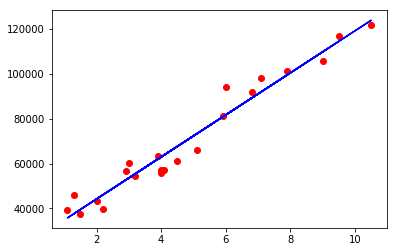

In [23]:
plt.scatter(x_data_train, y_data_train, color='red')
plt.plot(x_data_train, reg.predict(x_data_train), color='blue')
plt.show()

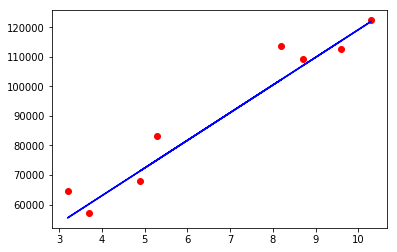

In [24]:
plt.scatter(x_data_test, y_data_test, color='red')
plt.plot(x_data_test, reg.predict(x_data_test), color='blue')
plt.show()